In [4]:
#Importing libraries
import os
import imghdr
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import layers,models
from keras.models import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:

#Unzipping the folder that has images
!unzip -q moon.zip -d /content/moon


In [5]:
#Directory where the images are stored
DATA_DIR = "/content/moon/moon"

In [6]:
# Categories of moon phases
CATEGORIES = ["New Moon", "Waxing Crescent", "First Quarter", "Waxing Gibbous",
              "Full Moon", "Waning Gibbous", "Last Quarter", "Waning Crescent"]

# Load and preprocess images
IMG_SIZE = 64  # Resize images to 64x64

def load_images(data_dir, categories):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append(img_resized)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

images, labels = load_images(DATA_DIR, CATEGORIES)

# Normalize the images
images = images / 255.0

# Convert labels to categorical
labels = to_categorical(labels, num_classes=len(CATEGORIES))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# # UNQ_C1
# # GRADED FUNCTION: identity_block
# import tensorflow
# import numpy as np
# from tensorflow.keras.initializers import random_uniform
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Activation
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.layers import Add




# def identity_block(X, f, filters, initializer=random_uniform):
#     """a
#     Implementation of the identity block as defined in Figure 4

#     Arguments:
#     X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f -- integer, specifying the shape of the middle CONV's window for the main path
#     filters -- python list of integers, defining the number of filters in the CONV layers of the main path
#     initializer -- to set up the initial weights of a layer. Equals to random uniform initializer

#     Returns:
#     X -- output of the identity block, tensor of shape (m, n_H, n_W, n_C)
#     """

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value. You'll need this later to add back to the main path.
#     X_shortcut = X

#     # First component of main path
#     X = Conv2D(filters = F1,
#                kernel_size = 1,
#                strides = (1,1),
#                padding = 'valid',
#                kernel_initializer = initializer(seed=0))(X)
#     X = BatchNormalization(axis = 3)(X) # Default axis
#     X = Activation('relu')(X)

#     ### START CODE HERE
#     ## Second component of main path (≈3 lines)
#     ## Set the padding = 'same'
#     X = Conv2D(filters = F2,
#                kernel_size = 1,
#                strides = (1,1),
#                padding = 'same',
#                kernel_initializer = initializer(seed=0))(X)
#     X = BatchNormalization(axis = 3)(X)
#     X = Activation('relu')(X)



#     ## Third component of main path (≈2 lines)
#     ## Set the padding = 'valid'
#     X = Conv2D(filters = F3,
#                kernel_size = 1,
#                strides = (1,1),
#                padding = 'valid',
#                kernel_initializer = initializer(seed=0))(X)
#     X = BatchNormalization(axis = 3)(X)

#     ## Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
#     X = Add()([X,X_shortcut])
#     X = Activation('relu')(X)
#     ### END CODE HERE

#     return X

In [ ]:
# ### you cannot edit this cell




# np.random.seed(1)
# tensorflow.random.set_seed(2)
# X1 = np.ones((1, 4, 4, 3)) * -1
# X2 = np.ones((1, 4, 4, 3)) * 1
# X3 = np.ones((1, 4, 4, 3)) * 3

# X = np.concatenate((X1, X2, X3), axis = 0).astype(np.float32)

# A3 = identity_block(X, f=2, filters=[4, 4, 3],
#                    initializer=lambda seed=0:Constant(value=1))
# print('\033[1mWith training=False\033[0m\n')
# A3np = A3.numpy()
# print(np.around(A3.numpy()[:,(0,-1),:,:].mean(axis = 3), 5))
# resume = A3np[:,(0,-1),:,:].mean(axis = 3)
# print(resume[1, 1, 0])



# print('\n\033[1mWith training=True\033[0m\n')
# np.random.seed(1)
# tensorflow.random.set_seed(2)
# A4 = identity_block(X, f=2, filters=[3, 3, 3],
#                    initializer=lambda seed=0:Constant(value=1))
# print(np.around(A4.numpy()[:,(0,-1),:,:].mean(axis = 3), 5))



With training=False

[[[  0.        0.        0.        0.     ]
  [  0.        0.        0.        0.     ]]

 [[ 48.9281   48.9281   48.9281   48.9281 ]
  [ 48.9281   48.9281   48.9281   48.9281 ]]

 [[146.78427 146.78427 146.78427 146.78427]
  [146.78427 146.78427 146.78427 146.78427]]]
48.928097

With training=True

[[[ 0.       0.       0.       0.     ]
  [ 0.       0.       0.       0.     ]]

 [[27.95956 27.95956 27.95956 27.95956]
  [27.95956 27.95956 27.95956 27.95956]]

 [[83.87866 83.87866 83.87866 83.87866]
  [83.87866 83.87866 83.87866 83.87866]]]


In [8]:
import tensorflow as tf
import numpy as np
import scipy.misc
# from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
# from resnets_utils import *
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow



np.random.seed(1)
tf.random.set_seed(2)

In [9]:
# UNQ_C1
# GRADED FUNCTION: identity_block
import tensorflow
import numpy as np
from tensorflow.keras.initializers import random_uniform
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Add




def identity_block(X, f, filters, initializer=random_uniform):
    """a
    Implementation of the identity block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    initializer -- to set up the initial weights of a layer. Equals to random uniform initializer

    Returns:
    X -- output of the identity block, tensor of shape (m, n_H, n_W, n_C)
    """

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1,
               kernel_size = 1,
               strides = (1,1),
               padding = 'valid',
               kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X) # Default axis
    X = Activation('relu')(X)

    ### START CODE HERE
    ## Second component of main path (≈3 lines)
    ## Set the padding = 'same'
    X = Conv2D(filters = F2,
               kernel_size = 1,
               strides = (1,1),
               padding = 'same',
               kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)



    ## Third component of main path (≈2 lines)
    ## Set the padding = 'valid'
    X = Conv2D(filters = F3,
               kernel_size = 1,
               strides = (1,1),
               padding = 'valid',
               kernel_initializer = initializer(seed=0))(X)
    X = BatchNormalization(axis = 3)(X)

    ## Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    ### END CODE HERE

    return X

In [10]:
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add

def convolutional_block(X, f, filters, s=2, initializer=glorot_uniform):
    F1, F2, F3 = filters
    X_shortcut = X

    # MAIN PATH
    X = Conv2D(F1, kernel_size=1, strides=(s, s), padding='valid',
               kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(F2, kernel_size=f, strides=(1, 1), padding='same',
               kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(F3, kernel_size=1, strides=(1, 1), padding='valid',
               kernel_initializer=initializer(seed=0))(X)
    X = BatchNormalization(axis=3)(X)

    # SHORTCUT PATH
    X_shortcut = Conv2D(F3, kernel_size=1, strides=(s, s), padding='valid',
                        kernel_initializer=initializer(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    # FINAL STEP
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


In [11]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Identity

In [12]:
def Resnet50(input_shape = (64,64,3), classes = 6,training = False):
  """
  Stage-wise Implementation of Architecture of ResNet50:

  Input -> Zero-Padding -> {Conv2d,BatchNormalization,Relu,MaxPooling} -> {Conv2d,ID*2} ->
  -> {Conv2d,ID*3} -> {Conv2d,ID*5} -> {Conv2d,ID*2} -> {AVG_Pooling,Flatten,FC(Dense)}

  Construction:

      Zero-Padding of (3,3) {3 rows of 0 top bottom left and right}

      Stage-1:
          1st Conv2d Has 64 filters of shape (7,7) -> (7,7,3,64) and stride of (2,2)
          BatchNormalization of axis 3
          Relu Activation
          Max_Pooling of window_Size = 3 and stride of 2

      Stage-2:
          Convulution Block has shape of (64,64,256) and kernel_size f =3 and stride = 1
          Identity block has same f and stride

      Stage-3:
          3rd Conv2d has shape (128,128,512) f = 3, and stride = 2
          Identity block has same f and stride

      Stage-4:
          4th Conv2d has shape (256,256,1024) f = 3 and stride = 2
          Same Parameters for Identity Block
      Stage-5:
          5th Conv2d has shape (515,512,2048) f = 3 and stide = 2

      Stage-6:
          Avg_Pooling of window_size = (2,2)
          Flatten has no hyperparameters
          FC layer has activation function as "SoftMax"


    Arguments :
        1. input image of size (64,64,3)
        2. Classification-Classes = 6
        3. Training Set to False

    Returns :
        A Model() Instance of Tensor

  """

  # Define the Input Shape as Tensor Input
  X_input = Input(input_shape)

  # Zero Padding
  X = ZeroPadding2D(padding = (3,3))(X_input)

  # Stage-1
  X = Conv2D(
      filters = 64,
      kernel_size = (7,7),
      strides = (2,2)
  )(X)

  X = BatchNormalization(axis = 3)(X)
  X = Activation('relu')(X)
  X = MaxPool2D(pool_size = (3,3), strides = (2,2))(X)


  # Stage-2
  X = convolutional_block(X,f=3,filters = [64,64,256],s = 1)
  for _ in range(2):
    X = identity_block(X,f=3,filters = [64,64,256])


  # Stage-3
  X = convolutional_block(X,f = 3,filters = [128,128,512],s=2)
  for _ in range(3):
    X = identity_block(X,f= 3,filters = [128,128,512])


  # Stage-4
  X = convolutional_block(X,f =3,filters = [256,256,1024],s = 2)
  for _ in range(5):
    X = identity_block(X,f = 3,filters = [256,256,1024])


  # Stage-5
  X = convolutional_block(X,f =3,filters = [512,512,2048],s=2)
  for _ in range(2):
    X = identity_block(X,f=3,filters = [512,512,2048])

  # Stage-6 (OUTPUT LAYERS)
    # - AVGPool
  X = AvgPool2D(pool_size = (2,2))(X)
    # - Flatten
  X = Flatten()(X)
    # - Dense
  X = Dense(classes, activation='softmax', kernel_initializer = glorot_uniform(seed=0))(X)


  # Creating a Model
  model = Model(inputs = X_input,outputs = X)

  return model


## CREATED A RESTNET MODEL FUCK YA









In [ ]:
# TODO : LOAD DATA INTO THIS MODEL AND model.fit()

In [14]:
model  = Resnet50(input_shape = (64,64,3),classes = len(CATEGORIES),training = True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 70, 70, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 15, 15,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 15, 15,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 15, 15,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 15, 15,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 15, 15,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 15, 15,    │     16,640 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 15, 15,    │     16,640 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │      1,024 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 16,329,608 (62.29 MB)

 Trainable params: 16,276,488 (62.09 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [15]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.2758 - loss: 4.2220 - val_accuracy: 0.3158 - val_loss: 2.0305
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.4032 - loss: 2.5865 - val_accuracy: 0.3158 - val_loss: 1.9907
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.5265 - loss: 1.3972 - val_accuracy: 0.3158 - val_loss: 2.0101
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.6442 - loss: 0.9664 - val_accuracy: 0.3158 - val_loss: 2.0500
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7320 - loss: 0.6733 - val_accuracy: 0.3158 - val_loss: 2.1082
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.8762 - loss: 0.3676 - val_accuracy: 0.1447 - val_loss: 2.2630
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9052 - loss: 0.2440 - val_accuracy: 0.1447 - val_loss: 2.5872
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8275 - loss: 0.3891 - val_accuracy: 0.3158 - val_loss:

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.3442 - loss: 3.7393
Test Accuracy: 0.32894736528396606


In [17]:
def predict_moon_phase(model, img_path):
    ## Reshaping image for Resnet
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_normalized = img_resized / 255.0
    img_reshaped = np.reshape(img_normalized, (1, IMG_SIZE, IMG_SIZE, 3))
    prediction = model.predict(img_reshaped)
    return CATEGORIES[np.argmax(prediction)]

In [22]:
#Testing model on different image
img_path = '/content/waxing_crescent.jpg'
predicted_phase = predict_moon_phase(model, img_path)
print("The predicted moon phase is:", predicted_phase)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The predicted moon phase is: First Quarter


In [21]:
img_path = '/content/full_moon.jpg'
predicted_phase = predict_moon_phase(model, img_path)
print("The predicted moon phase is:", predicted_phase)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
The predicted moon phase is: First Quarter


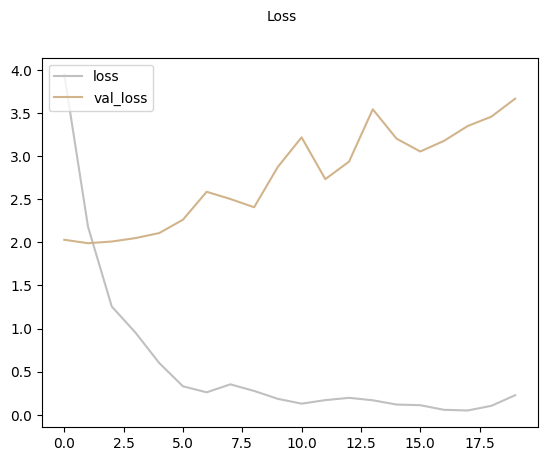

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='silver', label='loss')
plt.plot(history.history['val_loss'], color='tan', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper left")
plt.show()